Image Classification using Convolution Neural Network

source: https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_test

Train data: 14034 images
Test data:

In [108]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Activation, Flatten
import matplotlib.pyplot as plt

In [85]:
def load_data(dir_path):
    '''Loads the images and its corresponding labels and returns them as a tuple'''
    
    images, labels = [], []
    folders = sorted([fold for fold in os.listdir(dir_path)])
    try: 
        folders.remove('.DS_Store')
    except ValueError:
        pass
    label = dict(zip(folders, range(len(folders))))
    
    for fold in folders:
        for img in os.listdir(dir_path+'/'+fold):
            image = cv2.imread(dir_path+'/'+fold+'/'+img)
            image = cv2.resize(image,(150,150))
            images.append(image)
            labels.append(label[fold])
    return (np.array(images),np.array(labels))

In [84]:
fold_test = sorted([fold for fold in os.listdir('/Users/archana/Documents/GitHub/intel_image_classification/seg_test')])
dict(zip(fold_test, range(len(fold_test))))

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [86]:
## Load train_data
(X_train, y_train) = load_data('/Users/archana/Documents/GitHub/intel_image_classification/seg_train')
print("Train data")
print(f"Shape: {X_train.shape}, {y_train.shape}")

## Load test_data
(X_test, y_test) = load_data('/Users/archana/Documents/GitHub/intel_image_classification/seg_test')
print("Test data")
print(f"Shape: {X_test.shape}, {y_test.shape}")


Train data
Shape: (14034, 150, 150, 3), (14034,)
Test data
Shape: (3000, 150, 150, 3), (3000,)


In [87]:
X_train = X_train/255
X_test = X_test/255

In [89]:
y_train = to_categorical(y_train, num_classes = 6)
y_test = to_categorical(y_test, num_classes = 6)

In [100]:
### Convnet model architecture
model = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(Conv2D(48, (3,3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 146, 146, 48)      27696     
_________________________________________________________________
dropout_6 (Dropout)          (None, 146, 146, 48)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1023168)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               130965632 
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [101]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [102]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 25, verbose = 1)

Epoch 1/25
439/439 [==============================] - 663s 2s/step - loss: 1.4528 - accuracy: 0.5400
Epoch 2/25
439/439 [==============================] - 635s 1s/step - loss: 0.6307 - accuracy: 0.7731
Epoch 3/25
439/439 [==============================] - 1804s 4s/step - loss: 0.2559 - accuracy: 0.9149
Epoch 4/25
439/439 [==============================] - 2942s 7s/step - loss: 0.1030 - accuracy: 0.9695
Epoch 5/25
439/439 [==============================] - 38171s 87s/step - loss: 0.0823 - accuracy: 0.9790
Epoch 6/25
439/439 [==============================] - 625s 1s/step - loss: 0.0608 - accuracy: 0.9848
Epoch 7/25
439/439 [==============================] - 630s 1s/step - loss: 0.0425 - accuracy: 0.9890
Epoch 8/25
439/439 [==============================] - 627s 1s/step - loss: 0.0351 - accuracy: 0.9913
Epoch 9/25
439/439 [==============================] - 618s 1s/step - loss: 0.0301 - accuracy: 0.9929
Epoch 10/25
439/439 [==============================] - 639s 1s/step - loss: 0.0412 - a

In [103]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 23s 248ms/step - loss: 2.0422 - accuracy: 0.6957


[2.042212963104248, 0.6956666707992554]

In [120]:
model.predict_classes(X_test[0].reshape(1,150,150,3))


array([3])

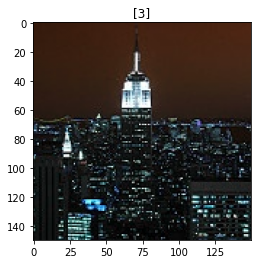

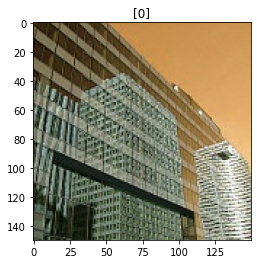

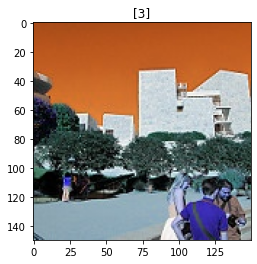

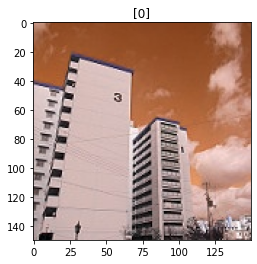

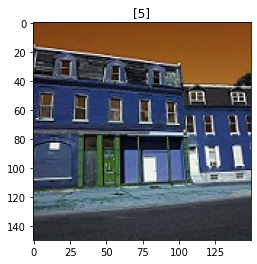

In [121]:
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(model.predict_classes(X_test[i].reshape(1,150,150,3)))
    plt.show()
  

In [123]:
len(model.weights)

8